<a href="https://colab.research.google.com/github/Jeong-ki-hun/Section2_Project/blob/main/%08AI_11_%EC%A0%95%EA%B8%B0%ED%9B%88(Section2_Project).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install category_encoders
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 8.5 MB/s 


In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rc('font', family='NanumBarunGothic') 
sns.set_style("whitegrid")

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import plot_confusion_matrix
import sklearn
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
from category_encoders import OrdinalEncoder, OneHotEncoder
from scipy.stats import randint, uniform
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
import shap

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
df = pd.read_csv('/content/drive/MyDrive/data.csv')

In [11]:
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


In [17]:
df = df[['price'	,'bedrooms',	'bathrooms',	'sqft_living',	'sqft_lot',	'floors',	'waterfront',	'view',	'condition','sqft_above',	'sqft_basement','yr_built']]

In [ ]:
pd.DataFrame

In [61]:
target = df['price']
features = df.drop(columns=['price'],axis=1)

In [62]:
X_train, X_val, y_train, y_val = train_test_split(features,target,test_size=0.1)

In [64]:
y_train

2885    1815000.0
2790     287500.0
1369    1381000.0
3944     288000.0
709      465750.0
          ...    
1127    1185000.0
1406     293000.0
1285     498000.0
781      819995.0
380      835000.0
Name: price, Length: 4140, dtype: float64

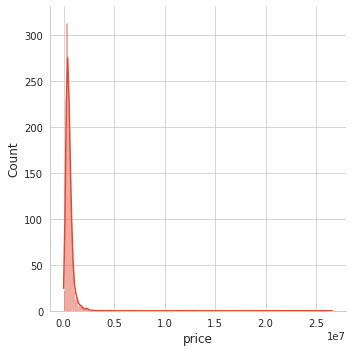

In [48]:
%matplotlib inline
import seaborn as sns
sns.displot(y_train, kde=True);

In [49]:
from category_encoders import TargetEncoder
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

linear = make_pipeline(
    TargetEncoder(),  
    LinearRegression()
)

linear.fit(X_train, y_train)
print('R^2', linear.score(X_val, y_val))

R^2 0.5108071969142431


Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327


In [51]:
coefficients = linear.named_steps['linearregression'].coef_


In [52]:
coefficients

array([-5.97864207e+04,  6.04659136e+04,  1.64195739e+02, -7.04489422e-01,
        2.95177973e+04,  3.33882341e+05,  4.30362657e+04,  2.62798954e+04,
        9.69975927e+01,  6.71981463e+01, -2.39183733e+03])

In [65]:
features

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built
0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955
1,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921
2,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966
3,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963
4,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976
...,...,...,...,...,...,...,...,...,...,...,...
4595,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954
4596,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983
4597,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009
4598,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974
